## 1. 데이터 탐색의 필요성

### Principle 1: 비교 
특정 가설에 대한 증거는 언제나 다른 가설에 대해 상대적으로 판단
“Compared to What?”

<img src="https://bookdown.org/rdpeng/exdata/images/principles-unnamed-chunk-2-1.png" width=50% align=left>
<img src="https://bookdown.org/rdpeng/exdata/images/principles-unnamed-chunk-3-1.png" width=50%>

### Principle 2: 인과관계
- 주어진 문제에 대해 어떤 인과관계를 유추할 수 있는가?

<img src="https://bookdown.org/rdpeng/exdata/images/principles-unnamed-chunk-5-1.png">

### Principle 3: 다변량 데이터
- 두 개 이상의 변수 간의 관계를 함께 고려하는가? 
<img src="https://bookdown.org/rdpeng/exdata/images/principles-unnamed-chunk-6-1.png" width=60%>

- 계절의 고려 
<img src=https://bookdown.org/rdpeng/exdata/images/principles-unnamed-chunk-7-1.png>

<img src=https://bookdown.org/rdpeng/exdata/images/principles-unnamed-chunk-9-1.png>

### Principle 4: 정보의 통합
- 상대방이 짧은 시간에 그래프만 훑어보더라도 이해할 수 있는 충분한 정보를 담고 있는가?
<img src=https://bookdown.org/rdpeng/exdata/images/principles-unnamed-chunk-10-1.png>

##### References
https://bookdown.org/rdpeng/exdata/principles-of-analytic-graphics.html




# 2. 시각화를 통한 가설 확인 및 데이터 관계 파악

In [1]:
# 데이터 분석용 패키지 불러오기
import pandas as pd
import numpy as np

# EDA용 패키지 불러오기
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Python에서 한글 폰트 설정
local_font_path = "c:/Windows/Fonts/malgun.ttf"
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname=local_font_path).get_name())

# 마이너스 부호 깨지는 현상 방지
plt.rc('axes', unicode_minus=False)

## 1) 데이터 불러오기

In [2]:
df = pd.read_csv('./data/movies_train.csv')
df.columns = ['영화제목','배급사','장르','개봉일자','상영시간',
                                    '상영등급','감독이름','이전영화_평균관객수',
                                    '이전영화_개수', '스태프수','배우수','관객수']
df.head()

,영화제목,배급사,장르,개봉일자,상영시간,상영등급,감독이름,이전영화_평균관객수,이전영화_개수,스태프수,배우수,관객수
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [3]:
df.shape

(600, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   영화제목        600 non-null    object 
 1   배급사         600 non-null    object 
 2   장르          600 non-null    object 
 3   개봉일자        600 non-null    object 
 4   상영시간        600 non-null    int64  
 5   상영등급        600 non-null    object 
 6   감독이름        600 non-null    object 
 7   이전영화_평균관객수  270 non-null    float64
 8   이전영화_개수     600 non-null    int64  
 9   스태프수        600 non-null    int64  
 10  배우수         600 non-null    int64  
 11  관객수         600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [5]:
new_columns = ['장르', '개봉일자', '상영시간', '이전영화_평균관객수', '이전영화_개수', '스태프수', '배우수', '관객수']

new_df = df.loc[:,new_columns]
new_df

,장르,개봉일자,상영시간,이전영화_평균관객수,이전영화_개수,스태프수,배우수,관객수
0,액션,2012-11-22,96,NaN,0,91,2,23398
1,느와르,2015-11-19,130,1161602.50,2,387,3,7072501
2,액션,2013-06-05,123,220775.25,4,343,4,6959083
3,코미디,2012-07-12,101,23894.00,2,20,6,217866
4,코미디,2010-11-04,108,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...
595,드라마,2014-08-13,111,3833.00,1,510,7,1475091
596,드라마,2013-03-14,127,496061.00,1,286,6,1716438
597,공포,2010-09-30,99,NaN,0,123,4,2475
598,느와르,2015-05-14,102,NaN,0,431,4,2192525


## 2) EDA

In [6]:
new_df.head()

,장르,개봉일자,상영시간,이전영화_평균관객수,이전영화_개수,스태프수,배우수,관객수
0,액션,2012-11-22,96,NaN,0,91,2,23398
1,느와르,2015-11-19,130,1161602.50,2,387,3,7072501
2,액션,2013-06-05,123,220775.25,4,343,4,6959083
3,코미디,2012-07-12,101,23894.00,2,20,6,217866
4,코미디,2010-11-04,108,1.00,1,251,2,483387


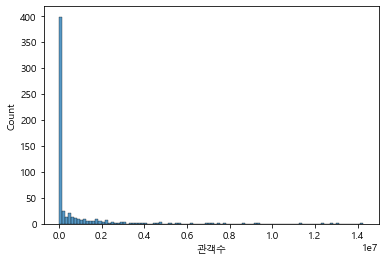

In [7]:
sns.histplot(x = '관객수', bins = 100, data = new_df)

### 가설 1 : 장르에 따라 평균 관객수에 차이가 있다.

#### 방법  1 : Matplotlib를 사용한다면?

In [8]:
hypo_1 = new_df.groupby(['장르'])['관객수'].agg(['mean', 'median','count']).reset_index().sort_values(by = ['mean'])
hypo_1

,장르,mean,median,count
6,뮤지컬,6.627000e+03,4778.0,5
3,다큐멘터리,6.717226e+04,3044.0,93
8,서스펜스,8.261100e+04,82611.0,2
9,애니메이션,1.819267e+05,23802.0,21
5,멜로/로맨스,4.259680e+05,3653.0,78
7,미스터리,5.275482e+05,3199.0,17
1,공포,5.908325e+05,179810.0,42
4,드라마,6.256898e+05,7173.0,221
11,코미디,1.193914e+06,210775.0,53
0,SF,1.788346e+06,9323.0,13


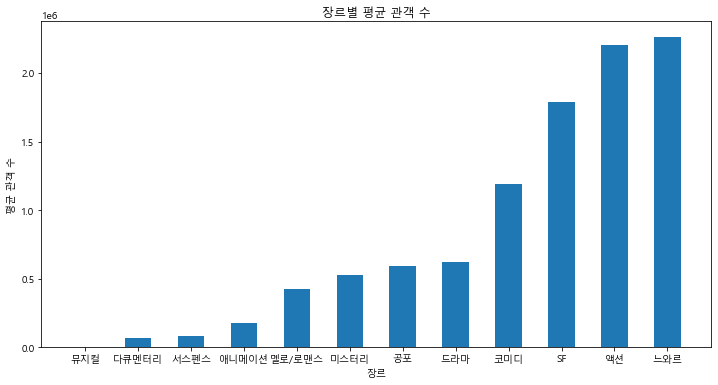

In [9]:
x = hypo_1['장르'].values
y = hypo_1['mean'].values

plt.figure(figsize = (12,6))
plt.bar(x,y, width = 0.5)

plt.title('장르별 평균 관객 수')
plt.xlabel('장르')
plt.ylabel('평균 관객 수')

plt.show()

#### 방법 2 : Seaborn을 사용한다.

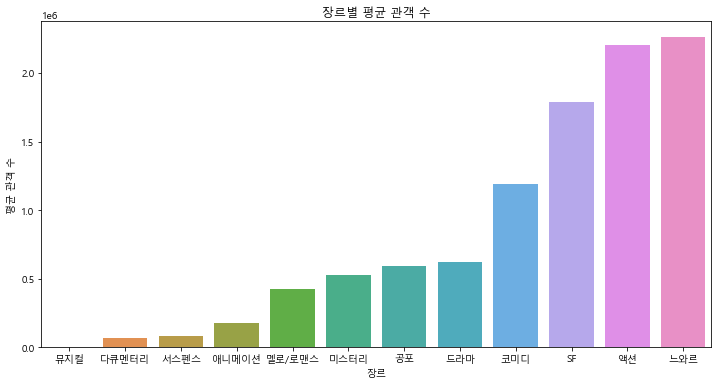

In [10]:
plt.figure(figsize = (12,6))
sns.barplot(x = '장르',
            y = 'mean',
            data = hypo_1,
            ci = None
)

plt.title('장르별 평균 관객 수')
plt.xlabel('장르')
plt.ylabel('평균 관객 수')

plt.show()

#### 방법 3 : Pandas에 내장된 기능을 사용한다.

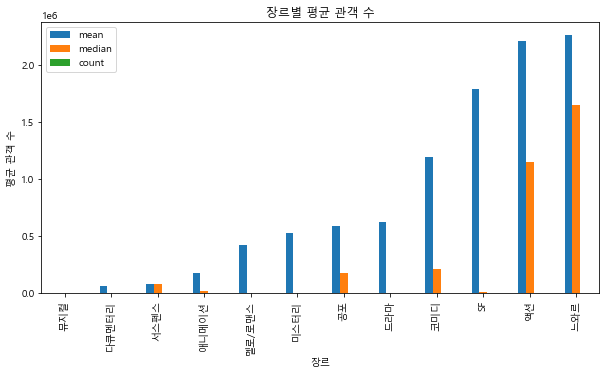

In [11]:
new_df.groupby(['장르'])['관객수'].agg(['mean', 'median','count']).sort_values(by = 'mean').plot.bar(figsize = (10,5))

plt.title('장르별 평균 관객 수')
plt.xlabel('장르')
plt.ylabel('평균 관객 수')

plt.show()

### 가설 2 : 상영시간에 따라 평균 관객수에 차이가 있다.

In [12]:
def re_num(x) : 
    return round(x, -1)

In [13]:
new_df['상영시간2'] = new_df.상영시간.apply(re_num)
new_df['상영시간2'] = new_df.상영시간.apply(lambda x :round(x,-1))

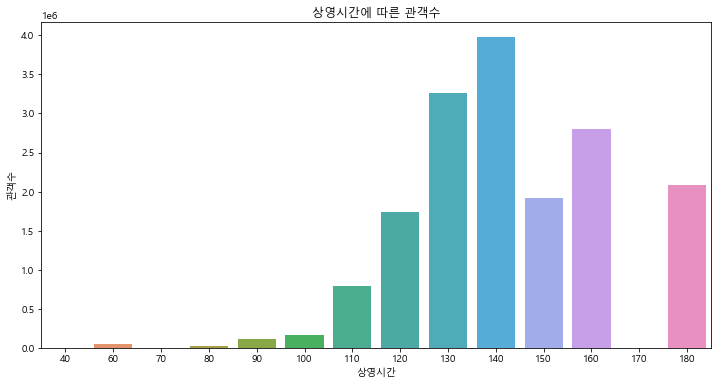

In [14]:
plt.figure(figsize = (12,6))
sns.barplot(x = '상영시간2',
            y = '관객수',
            data = new_df,
            ci = None
            )

plt.xlabel('상영시간')
plt.ylabel('관객수')
plt.title('상영시간에 따른 관객수')

# plt.xticks(rotation = 90)
plt.show()

### 가설 3 : 이전영화_개수에 따라 평균 관객수에 차이가 있다.

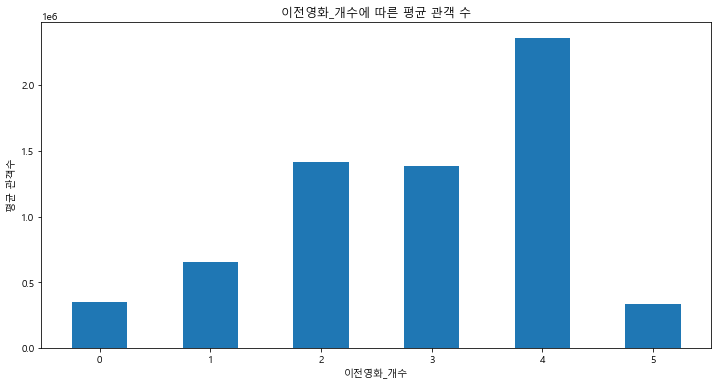

In [15]:
hypo_3 = new_df.groupby(['이전영화_개수'])['관객수'].agg('mean')
x = hypo_3.index
y = hypo_3.values

plt.figure(figsize = (12,6))
plt.bar(x,y, width = 0.5)

plt.title('이전영화_개수에 따른 평균 관객 수')
plt.xlabel('이전영화_개수')
plt.ylabel('평균 관객수')
plt.show()

### 가설4 : 이전에 촬영한 영화의 평균 관객수가 높을수록, 평균 관객수가 많다.

- 신입 감독들은 이전영화에 대한 평균 관객수가 없습니다.
    - 방법 1 : 이전영화_평균관객수를 0으로 채웁니다.
    - 방법 2 : 이전영화_개수가 1인 감독들의 이전영화_평균관객수의 평균으로 채웁니다.
    

- <b> Q) 어떤게 더 좋은 방법일까요? 또 다른 방법은 없을까요? </b>

- 평균관객수

In [16]:
new_df.isna().sum()

장르              0
개봉일자            0
상영시간            0
이전영화_평균관객수    330
이전영화_개수         0
스태프수            0
배우수             0
관객수             0
상영시간2           0
dtype: int64

In [17]:
new_df[new_df.이전영화_평균관객수.isna()]

,장르,개봉일자,상영시간,이전영화_평균관객수,이전영화_개수,스태프수,배우수,관객수,상영시간2
0,액션,2012-11-22,96,NaN,0,91,2,23398,100
6,다큐멘터리,2013-05-23,104,NaN,0,32,5,53526,100
8,뮤지컬,2014-09-18,129,NaN,0,3,5,4778,130
9,드라마,2012-03-15,94,NaN,0,138,3,868,90
10,멜로/로맨스,2015-07-27,89,NaN,0,0,4,745,90
...,...,...,...,...,...,...,...,...,...
593,미스터리,2013-09-12,97,NaN,0,5,3,1132,100
594,코미디,2014-03-20,94,NaN,0,37,5,1958,90
597,공포,2010-09-30,99,NaN,0,123,4,2475,100
598,느와르,2015-05-14,102,NaN,0,431,4,2192525,100


In [18]:
(new_df[new_df.이전영화_평균관객수.isna()].이전영화_개수 == 0).sum()

330

- 방법 1

In [19]:
new_df['방법1'] = new_df.이전영화_평균관객수.fillna(0)

- 방법 2 

In [20]:
junior_director_boxnum_mean = new_df.query('이전영화_개수 == 1').이전영화_평균관객수.mean()
new_df['방법2'] = new_df['이전영화_평균관객수'].fillna(junior_director_boxnum_mean)

In [21]:
new_df[['관객수','방법1','방법2']].corr()

,관객수,방법1,방법2
관객수,1.000000,0.293791,0.238788
방법1,0.293791,1.000000,0.939691
방법2,0.238788,0.939691,1.000000


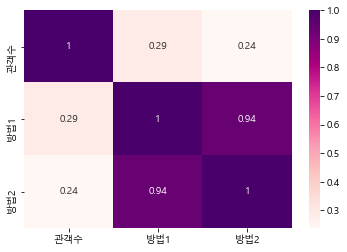

In [22]:
sns.heatmap(new_df[['관객수','방법1','방법2']].corr(),
            cmap = 'RdPu',
            annot=True)
plt.show()

In [23]:
# 방법 1이 관객수에 대한 Correlationship이 높으므로, 방법1을 채택한다.
new_df['이전영화_평균관객수'] = new_df.이전영화_평균관객수.fillna(0)

### 가설5 : 시간은 영화 평균 관객수에 영향을 준다.

- DataFrame의 index를 "Datetimeindex"형태로 바뀐 개봉일자로 만들어준다.

In [24]:
new_df.index = pd.DatetimeIndex(new_df.개봉일자)
new_df

,장르,개봉일자,상영시간,이전영화_평균관객수,이전영화_개수,스태프수,배우수,관객수,상영시간2,방법1,방법2
개봉일자,,,,,,,,,,,
2012-11-22,액션,2012-11-22,96,0.00,0,91,2,23398,100,0.00,9.012262e+05
2015-11-19,느와르,2015-11-19,130,1161602.50,2,387,3,7072501,130,1161602.50,1.161602e+06
2013-06-05,액션,2013-06-05,123,220775.25,4,343,4,6959083,120,220775.25,2.207752e+05
2012-07-12,코미디,2012-07-12,101,23894.00,2,20,6,217866,100,23894.00,2.389400e+04
2010-11-04,코미디,2010-11-04,108,1.00,1,251,2,483387,110,1.00,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
2014-08-13,드라마,2014-08-13,111,3833.00,1,510,7,1475091,110,3833.00,3.833000e+03
2013-03-14,드라마,2013-03-14,127,496061.00,1,286,6,1716438,130,496061.00,4.960610e+05
2010-09-30,공포,2010-09-30,99,0.00,0,123,4,2475,100,0.00,9.012262e+05


In [25]:
type(new_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

- new_df를 1개월 단위로 resample을 적용한다.

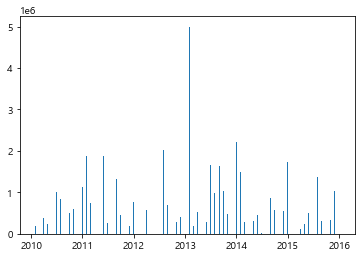

In [26]:
plot_1 = new_df.resample('1M')['관객수'].agg('mean')
x = plot_1.index
y = plot_1.values
plt.bar(x,
        y,
        width = 5)
plt.show()

- new_df를 3개월 단위로 resample을 적용한다.

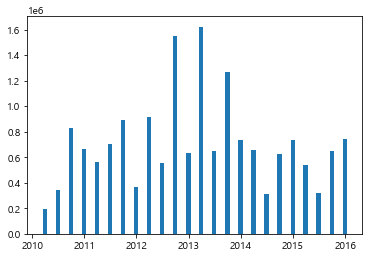

In [27]:
plot_2 = new_df.resample('1Q')['관객수'].agg('mean')
x = plot_2.index
y = plot_2.values
plt.bar(x,
        y,
        width = 30)
plt.show()

- new_df를 6개월 단위로 resample을 적용한다.

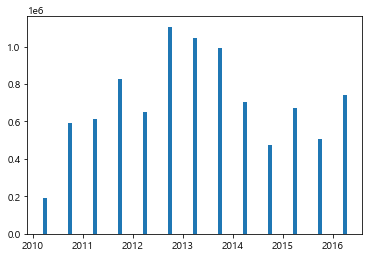

In [28]:
plot_3 = new_df.resample('2Q')['관객수'].agg('mean')
x = plot_3.index
y = plot_3.values
plt.bar(x,
        y,
        width = 30)
plt.show()

- new_df를 1년 단위로 resample을 적용한다.

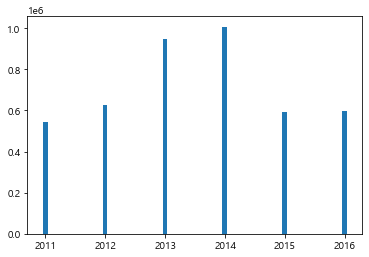

In [29]:
plot_4 = new_df.resample('1Y')['관객수'].agg('mean')
x = plot_4.index
y = plot_4.values
plt.bar(x,
        y,
        width = 30)
plt.show()